```Python
"""Demo DWT and IDWT of batched, multichannel tensors

TFDWT: Fast Discrete Wavelet Transform TensorFlow Layers.
Copyright (C) 2025 Kishore Kumar Tarafdar

This program is free software: you can redistribute it and/or modify
it under the terms of the GNU General Public License as published by
the Free Software Foundation, either version 3 of the License, or
(at your option) any later version.

This program is distributed in the hope that it will be useful,
but WITHOUT ANY WARRANTY; without even the implied warranty of
MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  See the
GNU General Public License for more details.

You should have received a copy of the GNU General Public License
along with this program.  If not, see <https://www.gnu.org/licenses/>.
"""
```

***This Notebook has additional dependencies***:

1. opencv-python
```bash
pip install opencv-python
```

2. matplotlib: 
```bash
pip install matplotlib
```

In [34]:
pwd

'/home/kkt/src/TFDWT.pypi/Tutorials'

In [35]:
!python --version

Python 3.12.9


GPU availability?

In [36]:
import tensorflow as tf
print(f"TensorFlow version {tf.__version__}")
print("CUDA Version:", tf.sysconfig.get_build_info()['cuda_version'])
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
gpus = tf.config.list_physical_devices('GPU')
len(gpus)

TensorFlow version 2.19.0
CUDA Version: 12.5.1
Num GPUs Available:  1


1

Select one GPU

        Restrict code to use a particular GPU...

In [37]:
# # include ../dirx 
mylibpath = [
    '/home/kkt/src'
    #'/home/k/PLAYGROUND10GB/SKULSTRIPpaper__'
    ]
import sys
[sys.path.insert(0,_) for _ in mylibpath]
del mylibpath

from tf_select_a_gpu import select_a_gpu

In [38]:
# select_gpu = gpus[gpu_id]
memory_limit = 8 #GB
select_a_gpu(gpus, gpu_id = 0, memory_limit=memory_limit)
# del gpu_id, select_a_gpu, select_gpu

1 Physical GPUs available 
Selected 1 Logical GPU with 8 GB memory limit


In [39]:
import TFDWT
TFDWT.__version__

'0.0.2'

        utils

In [40]:
def percenterror(x,xhat):
    """Compute percentage error"""
    true = tf.reduce_sum(tf.square(x)).numpy() 
    predict = tf.reduce_sum(tf.square(xhat)).numpy()
    e = (true - predict) / true
    ep = e*100
    # print(f"Percentage error is {e} %")
    print(f"Percentage error is {ep:.3f} % (upto 3 decimal places)")
    return ep

## 1D: DWT, IDWT \& Perfect Reconstruction of sequences

In [41]:
from TFDWT.DWTIDWT1Dv1 import DWT1D, IDWT1D

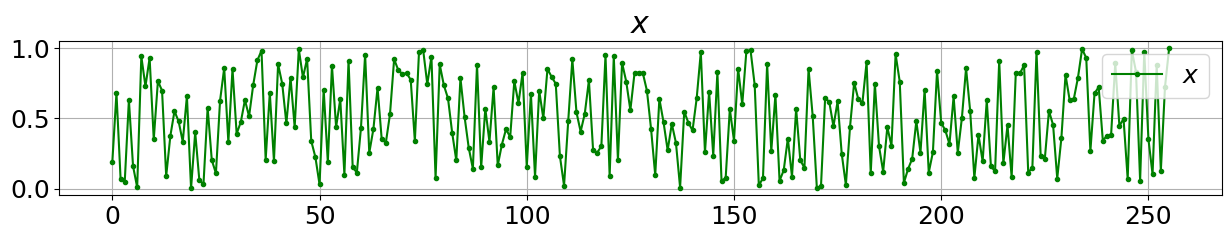

Raw x shape (256,)


In [42]:
# 1D dwt
N = 256 # length of the sequence
input_shape = (N,1)
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = '18'
x = np.random.rand(input_shape[0])
# x = tmpx
plt.figure(figsize=(15,2))
plt.plot(x, 'g.-',label='$x$')
plt.legend(), plt.grid()
plt.title('$x$')
plt.show()
print(f"Raw x shape {x.shape}")


    DWT 1D 

In [43]:
mother_wavelet = 'bior3.1' # max 'db8' for lenght 16 signal
# mother_wavelet = 'haar' # max 'db8' for lenght 16 signal
# mother_wavelet = 'db10' # max 'db8' for lenght 16 signal

newx = tf.expand_dims(tf.expand_dims(x,-1),0)
print(f'x shape {newx.shape}')
dwtout = DWT1D(wave=mother_wavelet)(newx)
print(f'DWT(x) shape {dwtout.shape}, \nDWT(x) := {dwtout}')


x shape (1, 256, 1)
DWT(x) shape (1, 128, 2), 
DWT(x) := [[[ 0.76310927 -0.4221025 ]
  [ 0.7095863  -0.30102637]
  [ 0.64215773  0.29108548]
  [-0.37451142 -0.13532665]
  [ 1.4385276  -0.2751467 ]
  [ 0.829986   -0.31373614]
  [ 1.3968205   0.01026133]
  [ 0.0505176   0.17689791]
  [ 0.8425311  -0.03185534]
  [ 0.8831024   0.25583228]
  [ 0.17506637  0.31699243]
  [-0.24673107 -0.04474841]
  [ 0.7768022  -0.21074769]
  [ 0.40548223  0.15875784]
  [ 0.7393784  -0.31930974]
  [ 1.0336105  -0.26914185]
  [ 0.85122377  0.0615842 ]
  [ 0.7833661   0.06885171]
  [ 1.6764827   0.13119328]
  [ 0.5258297   0.3912924 ]
  [ 0.64298487  0.3540383 ]
  [ 0.6916439  -0.13272256]
  [ 0.7888727  -0.27977306]
  [ 1.4098234  -0.1923565 ]
  [ 0.9815179  -0.21002597]
  [-0.09822255 -0.16732782]
  [ 0.6292099  -0.4217101 ]
  [ 1.098929   -0.3101576 ]
  [ 0.30549765 -0.3690455 ]
  [ 1.054389   -0.40439424]
  [ 0.18910252  0.02765664]
  [ 0.97984934 -0.36943305]
  [ 0.99765795  0.13829097]
  [ 0.27911866  0.0

    IDWT 1D

IDWT(DWT(x)) shape (1, 256, 1) 
IDWT(DWT(x)) := [[[0.18885967]
  [0.6812658 ]
  [0.06763256]
  [0.05082221]
  [0.6309386 ]
  [0.16135369]
  [0.00942692]
  [0.9406815 ]
  [0.72870195]
  [0.929953  ]
  [0.35069647]
  [0.7656918 ]
  [0.6980472 ]
  [0.08971569]
  [0.374622  ]
  [0.55208045]
  [0.47869343]
  [0.33466196]
  [0.65856075]
  [0.00318404]
  [0.40126884]
  [0.05963536]
  [0.03351933]
  [0.57605594]
  [0.20398033]
  [0.10946127]
  [0.6270254 ]
  [0.8586029 ]
  [0.3313097 ]
  [0.8514346 ]
  [0.39138988]
  [0.47367185]
  [0.63088757]
  [0.5146642 ]
  [0.73845005]
  [0.91276133]
  [0.98285234]
  [0.20658192]
  [0.68238485]
  [0.19677708]
  [0.8856995 ]
  [0.74640924]
  [0.46439505]
  [0.790449  ]
  [0.438851  ]
  [0.99223614]
  [0.79141176]
  [0.92451024]
  [0.33955812]
  [0.22464168]
  [0.03075837]
  [0.7044572 ]
  [0.19032012]
  [0.8738995 ]
  [0.43830544]
  [0.6380542 ]
  [0.09994911]
  [0.91162664]
  [0.15390015]
  [0.1143689 ]
  [0.4334499 ]
  [0.95469344]
  [0.25527006]
  [0.42

([<matplotlib.lines.Line2D at 0x7f175c16dbb0>],
 Text(0.5, 1.0, 'reconstuction using bior3.1'))

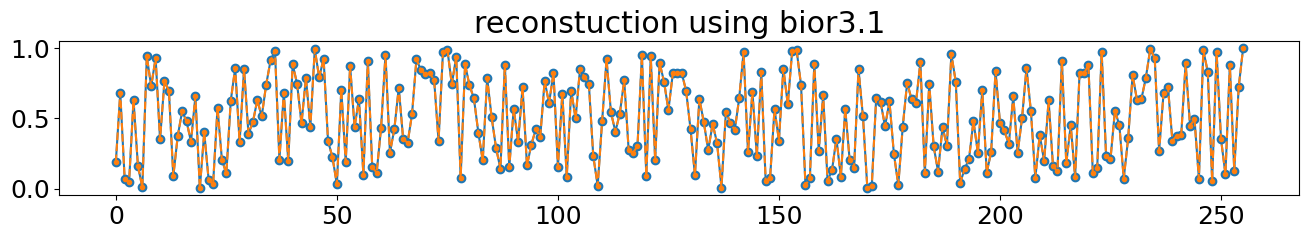

In [44]:
# print(dwtout.shape)
idwtout = IDWT1D(wave=mother_wavelet)(dwtout)
print(f'IDWT(DWT(x)) shape {idwtout.shape} \nIDWT(DWT(x)) := {idwtout}')

print(f'Check perfect reconstruction \nIDWT(DWT(x)) := {idwtout.numpy()} \n\nInput x is {x} ')

    

plt.figure(figsize=(16,2))
plt.plot(x,'o-')
plt.plot(idwtout.numpy()[0,:], '.--'), plt.title(f"reconstuction using {mother_wavelet}")

In [45]:
x.shape, idwtout.shape

((256,), TensorShape([1, 256, 1]))

        Reconstruction error

In [46]:
# tf.reduce_sum(tf.square(x)).numpy() - tf.reduce_sum(tf.square(idwtout)).numpy()
percenterror(x,idwtout)

Percentage error is 0.000 % (upto 3 decimal places)


np.float64(2.7216377533151044e-05)

## 2D: DWT, IDWT \& Perfect Reconstruction of Images

In [47]:
from TFDWT.DWTIDWT2Dv1 import DWT2D, IDWT2D

raw x shape: (814, 800)
x shape: (512, 512)


Text(0.5, 1.0, 'input $x$')

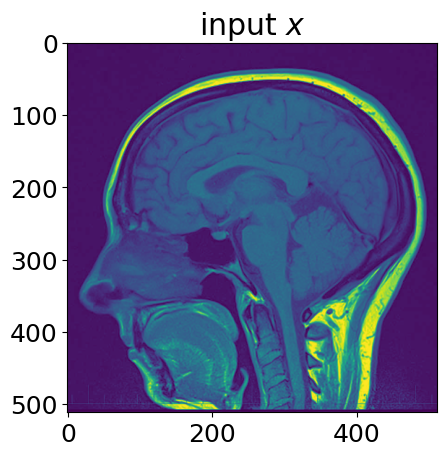

In [48]:
import cv2
x = cv2.imread(f'/home/kkt/src/TFDWT.pypi/Tutorials/brain.png',cv2.IMREAD_GRAYSCALE) #test.jpg
print('raw x shape:', x.shape)
x = cv2.resize(x, (512,512))
print('x shape:', x.shape)
#x = x/np.max(x)

import matplotlib.pyplot as plt
plt.imshow(x,label='$x$')
plt.title('input $x$')

raw x shape: (256, 256)


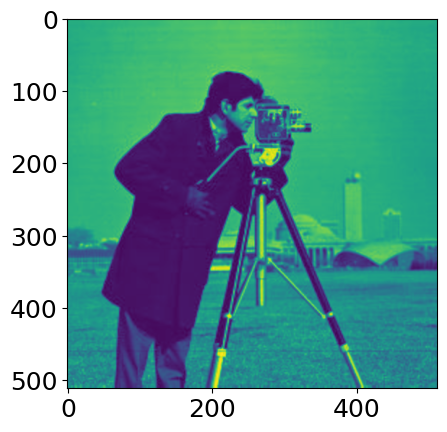

In [49]:
x1 = cv2.imread(f'/home/kkt/src/TFDWT.pypi/Tutorials/cameraman.jpg',cv2.IMREAD_GRAYSCALE) #test.jpg
print('raw x shape:', x1.shape)
x1 = cv2.resize(x1, (512,512))
# print('x shape:', x.shape)
#x = x/np.max(x)

# import matplotlib.pyplot as plt
plt.imshow(x1,label='$x$')

raw x shape: (256, 256)
x shape: (512, 512)


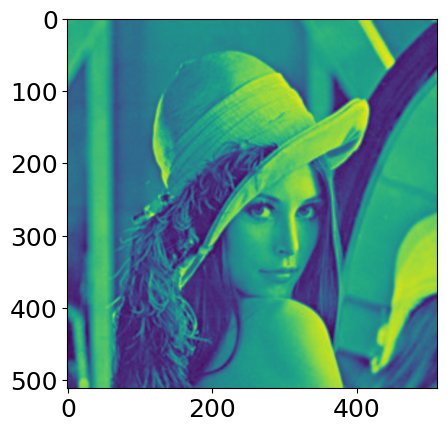

In [50]:
x2 = cv2.imread(f'/home/kkt/src/TFDWT.pypi/Tutorials/lena.jpg',cv2.IMREAD_GRAYSCALE) #test.jpg
print('raw x shape:', x2.shape)
x2 = cv2.resize(x2, (512,512))
print('x shape:', x2.shape)
#x = x/np.max(x)

# import matplotlib.pyplot as plt
plt.imshow(x2,label='$x$')

    Sample input for 2D TensorFlow layer

In [51]:
x.shape
xnew = tf.expand_dims(tf.expand_dims(x, axis=-1), axis=0)
xnew.shape

xnew1 = tf.expand_dims(tf.expand_dims(x1, axis=-1), axis=0)
xnew1.shape

xnew2 = tf.expand_dims(tf.expand_dims(x2, axis=-1), axis=0)
xnew2.shape


# xnew1 = tf.transpose(xnew, perm=[0,2,1,3])
# xnew1.shape
# del x, x1

xnew = tf.cast(xnew, dtype=tf.float32)/255
xnew1 = tf.cast(xnew1, dtype=tf.float32)/255
xnew2 = tf.cast(xnew2, dtype=tf.float32)/255
print(tf.reduce_min(xnew)), print(tf.reduce_max(xnew))
print(tf.reduce_min(xnew1)), print(tf.reduce_max(xnew1))
print(tf.reduce_min(xnew2)), print(tf.reduce_max(xnew2))

_1 = tf.concat([xnew,xnew1,xnew2],axis=-1)
_2 = tf.concat([xnew2,xnew,xnew1],axis=-1)
xnew = tf.cast(tf.concat([_1,_2], axis=0), dtype=tf.float32)
_1.shape,_2.shape, xnew.shape, _1.dtype,_2.dtype, xnew.dtype
# del _1, _2

tf.Tensor(0.0, shape=(), dtype=float32)
tf.Tensor(1.0, shape=(), dtype=float32)
tf.Tensor(0.003921569, shape=(), dtype=float32)
tf.Tensor(0.99215686, shape=(), dtype=float32)
tf.Tensor(0.09803922, shape=(), dtype=float32)
tf.Tensor(0.9254902, shape=(), dtype=float32)


(TensorShape([1, 512, 512, 3]),
 TensorShape([1, 512, 512, 3]),
 TensorShape([2, 512, 512, 3]),
 tf.float32,
 tf.float32,
 tf.float32)

In [52]:
print(tf.reduce_min(xnew)), print(tf.reduce_max(xnew))

tf.Tensor(0.0, shape=(), dtype=float32)
tf.Tensor(1.0, shape=(), dtype=float32)


(None, None)

    DWT 2D

(2, 256, 256, 12)
tf.Tensor(-0.31083655, shape=(), dtype=float32)
tf.Tensor(2.4014206, shape=(), dtype=float32)


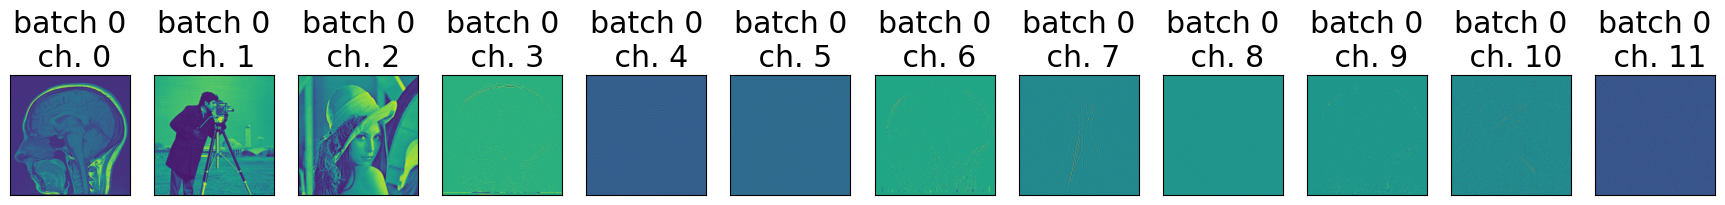

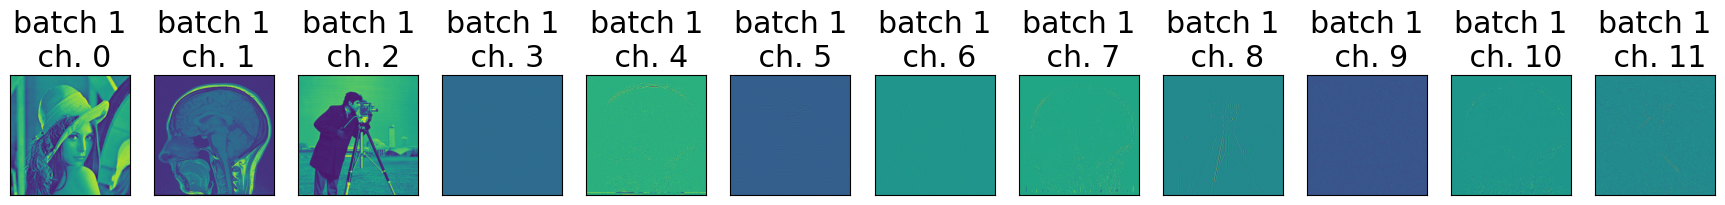

In [53]:
wave = 'haar'
wave = 'db6'
wave = 'bior3.1'
coeffs = DWT2D(wave=wave)(xnew)
print(coeffs.shape)
print(tf.reduce_min(coeffs)), print(tf.reduce_max(coeffs))
# import matplotlib.pyplot as plt

def plotall(_, thresh=0):
    # _ = coeffs
    for b in range(_.shape[0]):
        plt.figure(figsize=(22,8))
        for c in range(_.shape[-1]):
            plt.subplot(1, _.shape[-1], c+1), 
            if thresh==0:
                plt.imshow(_[b,:,:,c]), plt.title(f'batch {b}\n ch. {c}')
            else:
                plt.imshow(_[b,:,:,c]>thresh), plt.title(f'batch {b}\n ch. {c}')
            plt.xticks([])
            plt.yticks([])
        plt.show()
plotall(coeffs, 0)    

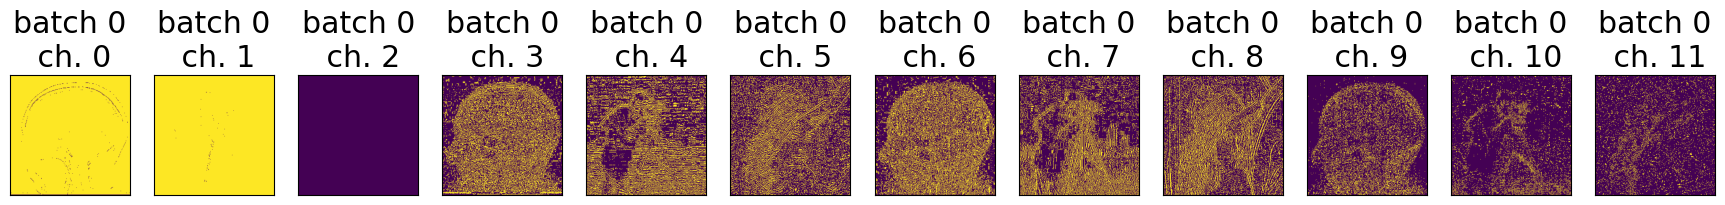

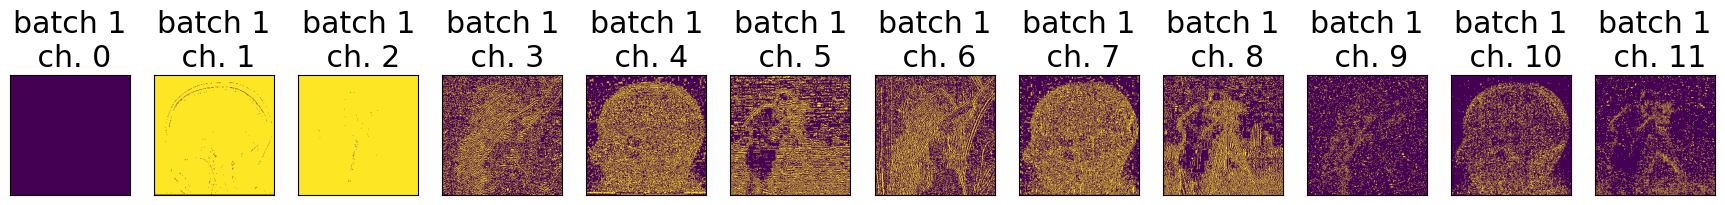

In [54]:
plotall(coeffs, 0.001) 

In [55]:
coeffs.shape

TensorShape([2, 256, 256, 12])

    IDWT 2D

(2, 512, 512, 3) <dtype: 'float32'>


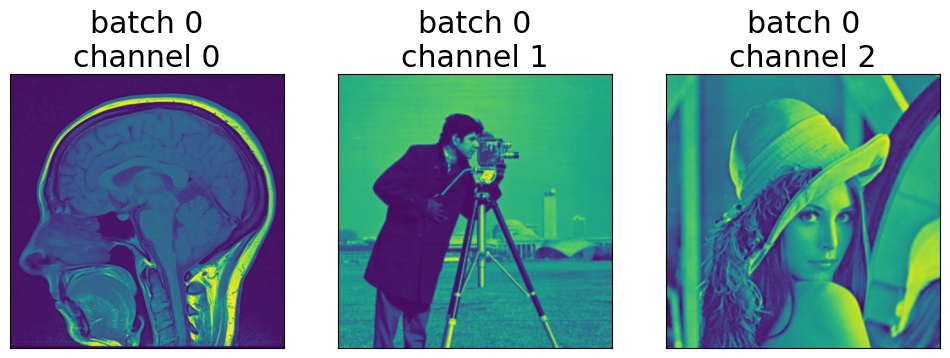

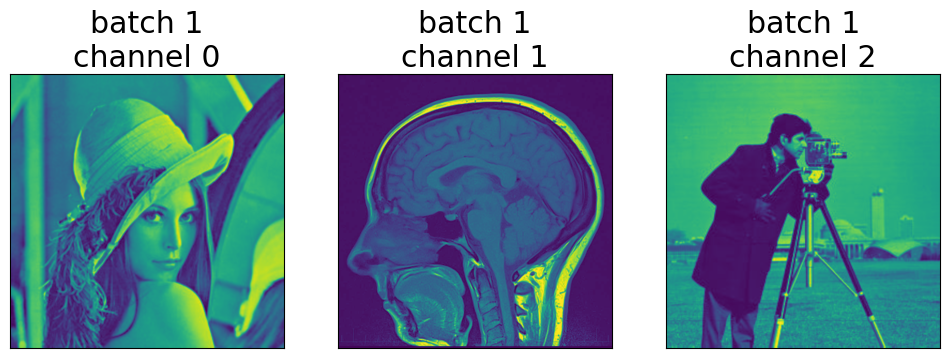

In [56]:
out = IDWT2D(wave=wave)(coeffs)
# [_.shape for _ in out]
print(out.shape, out.dtype)
# import matplotlib.pyplot as plt
_ = out
for b in range(_.shape[0]):
    plt.figure(figsize=(12,4))
    for c in range(_.shape[-1]):
        plt.subplot(1, _.shape[-1], c+1), plt.imshow(_[b,:,:,c]), plt.title(f'batch {b}\nchannel {c}')
        plt.xticks([])
        plt.yticks([])
    plt.show()

In [57]:
xnew.shape, out.shape, tf.reduce_sum(tf.square(xnew)), tf.reduce_sum(tf.square(out))

(TensorShape([2, 512, 512, 3]),
 TensorShape([2, 512, 512, 3]),
 <tf.Tensor: shape=(), dtype=float32, numpy=332461.6875>,
 <tf.Tensor: shape=(), dtype=float32, numpy=332183.4375>)

        reconstruction error

In [58]:
# tf.reduce_sum(tf.square(xnew)) - tf.reduce_sum(tf.square(out))
percenterror(xnew,out)

Percentage error is 0.084 % (upto 3 decimal places)


np.float32(0.083693855)

In [59]:
pwd

'/home/kkt/src/TFDWT.pypi/Tutorials'

## 3D: DWT, IDWT \& Perfect Reconstruction


In [60]:
# # include ../dirx 
mylibpath = [
    '/home/kkt/src/TFDWT.pypi/TFDWT'
    #'/home/k/PLAYGROUND10GB/SKULSTRIPpaper__'
    ]
import sys
[sys.path.insert(0,_) for _ in mylibpath]
del mylibpath

from DWTIDWT3Dv1 import DWT3D, IDWT3D

In [61]:
# from TFDWT.DWTIDWT3Dv1 import DWT3D, IDWT3D

In [62]:
# x3d = tf.random.uniform((2, 16, 16, 16, 3))
x3d = tf.random.uniform((2, 256, 256, 256, 3))

In [63]:
LLLLLHLHLLHHHLLHLHHHLHHH = DWT3D(wave=wave)(x3d)      # Analysis
x_hat = IDWT3D(wave=wave)(LLLLLHLHLLHHHLLHLHHHLHHH) # Synthesis

Biothogonal wavelet bior3.1


In [64]:
x_hat.shape, LLLLLHLHLLHHHLLHLHHHLHHH.shape

(TensorShape([2, 256, 256, 256, 3]), TensorShape([2, 128, 128, 128, 24]))

In [65]:
x3d.shape, x_hat.shape, tf.reduce_sum(tf.square(x3d)), tf.reduce_sum(tf.square(x_hat))

(TensorShape([2, 256, 256, 256, 3]),
 TensorShape([2, 256, 256, 256, 3]),
 <tf.Tensor: shape=(), dtype=float32, numpy=33550472.0>,
 <tf.Tensor: shape=(), dtype=float32, numpy=34411256.0>)

In [66]:
percenterror(x3d,x_hat)  

Percentage error is -2.566 % (upto 3 decimal places)


np.float32(-2.565639)